In [1]:
import sys
sys.path.insert(0,'..')

from nets.core import train_model, prune_neurons, grow_neurons, get_layer_sizes, initialize_parameters, get_param_string, train_dynamic_model, measure_accuracy
from nets.datasets import mnist_3, fashion_mnist_tshirt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy

%matplotlib inline
%load_ext autoreload
%autoreload 2

np.random.seed(42)

# Load the data

In [2]:
X_train_m, X_test_m, y_train_m, y_test_m = mnist_3()
X_train_m.shape, y_train_m.shape, X_test_m.shape, y_test_m.shape

((784, 48000), (1, 48000), (784, 12000), (1, 12000))

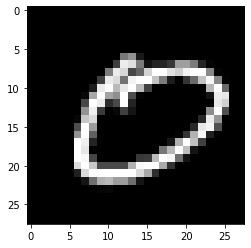

In [3]:
pixels = X_train_m[:, 1].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [4]:
X_train_fm, X_test_fm, y_train_fm, y_test_fm = fashion_mnist_tshirt()
X_train_fm.shape, y_train_fm.shape, X_test_fm.shape, y_test_fm.shape

((784, 48000), (1, 48000), (784, 12000), (1, 12000))

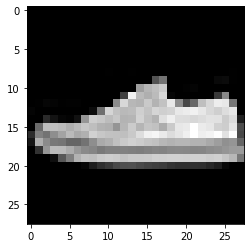

In [5]:
pixels = X_train_fm[:, 1].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# Test pruning neurons

In [7]:
layers_dims = [784, 20, 20, 1]

In [13]:
parameters = initialize_parameters(layers_dims)
parameters = train_model(X_train_m, y_train_m, parameters, learning_rate=0.05, l1_term=0.05, num_epochs=20, print_cost=True)

Cost after epoch 0: 0.359812
Cost after epoch 1: 0.214252
Cost after epoch 2: 0.156755
Cost after epoch 3: 0.126837
Cost after epoch 4: 0.119046
Cost after epoch 5: 0.112092
Cost after epoch 6: 0.110529
Cost after epoch 7: 0.105766
Cost after epoch 8: 0.101518
Cost after epoch 9: 0.096901
Cost after epoch 10: 0.092610
Cost after epoch 11: 0.088425
Cost after epoch 12: 0.087657
Cost after epoch 13: 0.084147
Cost after epoch 14: 0.080914
Cost after epoch 15: 0.081007
Cost after epoch 16: 0.076784
Cost after epoch 17: 0.075424
Cost after epoch 18: 0.081668
Cost after epoch 19: 0.077549


In [15]:
measure_accuracy(parameters, X_train_m, y_train_m)

0.9865416666666667

In [17]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train_m, y_train_m, parameters, learning_rate=0.05, l1_term=0.05, self_scale=True, num_epochs=20, print_cost=True)

Cost after epoch 0: 0.297169
Cost after epoch 1: 0.154100
Cost after epoch 2: 0.120355
Cost after epoch 3: 0.104911
Cost after epoch 4: 0.101299
Cost after epoch 5: 0.087843
Cost after epoch 6: 0.090634
Cost after epoch 7: 0.092526
Cost after epoch 8: 0.079348
Cost after epoch 9: 0.080150
Cost after epoch 10: 0.080602
Cost after epoch 11: 0.077172
Cost after epoch 12: 0.076063
Cost after epoch 13: 0.072677
Cost after epoch 14: 0.063783
Cost after epoch 15: 0.061885
Cost after epoch 16: 0.061831
Cost after epoch 17: 0.062763
Cost after epoch 18: 0.061132
Cost after epoch 19: 0.060422


In [20]:
measure_accuracy(parameters_scaled, X_train_m, y_train_m)

0.9818333333333333

In [19]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_neurons(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 2, 5, 1]

In [21]:
measure_accuracy(parameters_pruned, X_train_m, y_train_m)

0.9818333333333333

In [22]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train_m, y_train_m, parameters, learning_rate=0.05, l1_term=0.01, self_scale=True, num_epochs=20, print_cost=True)

Cost after epoch 0: 0.317890
Cost after epoch 1: 0.180584
Cost after epoch 2: 0.122194
Cost after epoch 3: 0.093648
Cost after epoch 4: 0.075114
Cost after epoch 5: 0.064961
Cost after epoch 6: 0.059103
Cost after epoch 7: 0.052779
Cost after epoch 8: 0.049598
Cost after epoch 9: 0.047101
Cost after epoch 10: 0.043771
Cost after epoch 11: 0.042957
Cost after epoch 12: 0.041046
Cost after epoch 13: 0.040205
Cost after epoch 14: 0.040432
Cost after epoch 15: 0.040886
Cost after epoch 16: 0.040099
Cost after epoch 17: 0.036542
Cost after epoch 18: 0.036072
Cost after epoch 19: 0.034638


In [23]:
measure_accuracy(parameters_scaled, X_train_m, y_train_m)

0.988625

In [24]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_neurons(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 7, 8, 1]

In [25]:
measure_accuracy(parameters_pruned, X_train_m, y_train_m)

0.988625

In [26]:
layers_dims = [784, 100, 100, 1]

In [27]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train_m, y_train_m, parameters, learning_rate=0.05, l1_term=0.01, self_scale=True, num_epochs=20, print_cost=True)

Cost after epoch 0: 0.782117
Cost after epoch 1: 0.396082
Cost after epoch 2: 0.310997
Cost after epoch 3: 0.277403
Cost after epoch 4: 0.261473
Cost after epoch 5: 0.247344
Cost after epoch 6: 0.234010
Cost after epoch 7: 0.230796
Cost after epoch 8: 0.231137
Cost after epoch 9: 0.232779
Cost after epoch 10: 0.229599
Cost after epoch 11: 0.228239
Cost after epoch 12: 0.221841
Cost after epoch 13: 0.218048
Cost after epoch 14: 0.215499
Cost after epoch 15: 0.216250
Cost after epoch 16: 0.218483
Cost after epoch 17: 0.217932
Cost after epoch 18: 0.213969
Cost after epoch 19: 0.214877


In [28]:
measure_accuracy(parameters_scaled, X_train_m, y_train_m)

0.9879375

In [34]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_neurons(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 5, 7, 1]

In [37]:
print(get_param_string(parameters_pruned['W1']))
print(get_param_string(parameters_pruned['W2']))

11111
0121011


In [35]:
measure_accuracy(parameters_pruned, X_train_m, y_train_m)

0.9878958333333333

# Test growing neurons

In [36]:
parameters_grown = copy.deepcopy(parameters_pruned)
grow_neurons(parameters_grown)
get_layer_sizes(parameters_grown)

[784, 10, 12, 1]

In [38]:
print(get_param_string(parameters_grown['W1']))
print(get_param_string(parameters_grown['W2']))

1111122222
011101112212


In [39]:
parameters_grown['W1'].shape

(10, 784)

In [40]:
parameters_grown['W2'].shape

(12, 10)

In [54]:
layers_dims = [784, 10, 10, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_m, y_train_m, parameters, learning_rate=0.01, l1_term=0.002, n_iterations=5)

After growing: [784, 15, 15, 1]
111111111133333
110110110033333
Cost after epoch 0: 0.152068
Cost after epoch 1: 0.101780
Cost after epoch 2: 0.086675
Cost after epoch 3: 0.078669
Cost after epoch 4: 0.073484
Iteration 1: accuracy 0.9774791666666667
After pruning: [784, 15, 15, 1]
Accuracy 0.9774791666666667
111111111122222
110110110022222
-------------------
After growing: [784, 20, 20, 1]
11111111112222233333
11011011001111133333
Cost after epoch 0: 0.074828
Cost after epoch 1: 0.071787
Cost after epoch 2: 0.069272
Cost after epoch 3: 0.067022
Cost after epoch 4: 0.064941
Iteration 2: accuracy 0.9826875
After pruning: [784, 15, 16, 1]
Accuracy 0.9826875
111111111122222
1101101100222233
-------------------
After growing: [784, 20, 21, 1]
11111111112222233333
110110110011111133333
Cost after epoch 0: 0.063942
Cost after epoch 1: 0.062330
Cost after epoch 2: 0.060768
Cost after epoch 3: 0.059234
Cost after epoch 4: 0.057587
Iteration 3: accuracy 0.9858125
After pruning: [784, 15, 16, 1]

In [55]:
measure_accuracy(parameters, X_train_m, y_train_m)

0.989125

In [56]:
layers_dims = [784, 3, 3, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_m, y_train_m, parameters, learning_rate=0.01, l1_term=0.002, n_iterations=5)

After growing: [784, 8, 8, 1]
11133333
01033233
Cost after epoch 0: 0.114036
Cost after epoch 1: 0.087633
Cost after epoch 2: 0.070972
Cost after epoch 3: 0.055175
Cost after epoch 4: 0.042520
Iteration 1: accuracy 0.9767916666666666
After pruning: [784, 8, 8, 1]
Accuracy 0.9767916666666666
11112222
01011212
-------------------
After growing: [784, 13, 13, 1]
1111222233333
0101111133233
Cost after epoch 0: 0.036444
Cost after epoch 1: 0.033487
Cost after epoch 2: 0.031706
Cost after epoch 3: 0.030753
Cost after epoch 4: 0.030708
Iteration 2: accuracy 0.9800625
After pruning: [784, 12, 11, 1]
Accuracy 0.9800625
111122222432
01011111232
-------------------
After growing: [784, 17, 16, 1]
11112222243233333
0101111111123333
Cost after epoch 0: 0.033145
Cost after epoch 1: 0.033334
Cost after epoch 2: 0.031064
Cost after epoch 3: 0.029907
Cost after epoch 4: 0.028567
Iteration 3: accuracy 0.9826666666666667
After pruning: [784, 12, 12, 1]
Accuracy 0.9826666666666667
111122222322
01011111111

In [57]:
measure_accuracy(parameters, X_train_m, y_train_m)

0.9883958333333334

# Fashion MNIST

In [58]:
layers_dims = [784, 100, 100, 1]

In [65]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.002, self_scale=True, num_epochs=20, print_cost=True)

Cost after epoch 0: 3.471439
Cost after epoch 1: 1.922243
Cost after epoch 2: 1.201067
Cost after epoch 3: 0.824852
Cost after epoch 4: 0.598112
Cost after epoch 5: 0.455540
Cost after epoch 6: 0.358875
Cost after epoch 7: 0.291958
Cost after epoch 8: 0.246167
Cost after epoch 9: 0.212625
Cost after epoch 10: 0.186393
Cost after epoch 11: 0.164651
Cost after epoch 12: 0.150406
Cost after epoch 13: 0.137818
Cost after epoch 14: 0.127331
Cost after epoch 15: 0.119736
Cost after epoch 16: 0.111852
Cost after epoch 17: 0.106494
Cost after epoch 18: 0.100673
Cost after epoch 19: 0.096830


In [66]:
measure_accuracy(parameters_scaled, X_train_fm, y_train_fm)

0.9618125

In [67]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_neurons(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 22, 43, 1]

In [69]:
layers_dims = [784, 3, 3, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.002, n_iterations=10)

After growing: [784, 8, 8, 1]
11133333
01033233
Cost after epoch 0: 0.064613
Cost after epoch 1: 0.058200
Cost after epoch 2: 0.064434
Cost after epoch 3: 0.064971
Cost after epoch 4: 0.063740
Iteration 1: accuracy 0.9601041666666666
After pruning: [784, 7, 8, 1]
Accuracy 0.9601041666666666
1111222
01022215
-------------------
After growing: [784, 12, 13, 1]
111122233333
0101111133233
Cost after epoch 0: 0.061949
Cost after epoch 1: 0.058552
Cost after epoch 2: 0.059104
Cost after epoch 3: 0.060814
Cost after epoch 4: 0.058835
Iteration 2: accuracy 0.9611666666666666
After pruning: [784, 9, 9, 1]
Accuracy 0.9611875
111121232
010111112
-------------------
After growing: [784, 14, 14, 1]
11112123233333
01011111132333
Cost after epoch 0: 0.061744
Cost after epoch 1: 0.059893
Cost after epoch 2: 0.047801
Cost after epoch 3: 0.058577
Cost after epoch 4: 0.057644
Iteration 3: accuracy 0.963
After pruning: [784, 8, 9, 1]
Accuracy 0.963
11112122
010111112
-------------------
After growing: [78

In [70]:
layers_dims = [784, 100, 100, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.002, n_iterations=10)

After growing: [784, 110, 110, 1]
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111113333333333
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111113333333333
Cost after epoch 0: 3.601171
Cost after epoch 1: 2.016749
Cost after epoch 2: 1.269526
Cost after epoch 3: 0.874773
Cost after epoch 4: 0.635476
Iteration 1: accuracy 0.9545833333333333
After pruning: [784, 76, 100, 1]
Accuracy 0.9546875
1111111111111111111111111211112222211222222222122222222222222222223233333232
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111121221111121
-------------------
After growing: [784, 83, 110, 1]
11111111111111111111111112111122222112222222221222222222222222222232333332323333333
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111113333333333
Cost after epoch 0: 0.497077
Cost after epoch 1: 0.393175
Cost after epoch 2: 0.

In [71]:
layers_dims = [784, 3, 3, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.002, n_iterations=10)

After growing: [784, 8, 8, 1]
11155555
01055455
Cost after epoch 0: 0.066023
Cost after epoch 1: 0.060020
Cost after epoch 2: 0.050706
Cost after epoch 3: 0.056405
Cost after epoch 4: 0.057278
Iteration 1: accuracy 0.9592291666666667
After pruning: [784, 8, 8, 1]
Accuracy 0.9592291666666667
11112222
01011212
-------------------
After growing: [784, 13, 13, 1]
1111222255555
0101111155455
Cost after epoch 0: 0.053881
Cost after epoch 1: 0.056833
Cost after epoch 2: 0.060530
Cost after epoch 3: 0.062232
Cost after epoch 4: 0.061549
Iteration 2: accuracy 0.9612083333333333
After pruning: [784, 9, 10, 1]
Accuracy 0.9612083333333333
111122221
0101121122
-------------------
After growing: [784, 14, 15, 1]
11112222155555
010111111154555
Cost after epoch 0: 0.061748
Cost after epoch 1: 0.064419
Cost after epoch 2: 0.061927
Cost after epoch 3: 0.063600
Cost after epoch 4: 0.062343
Iteration 3: accuracy 0.9642916666666667
After pruning: [784, 9, 12, 1]
Accuracy 0.9642708333333333
111122221
010112

In [72]:
layers_dims = [784, 3, 3, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.002, n_iterations=5)

After growing: [784, 8, 8, 1]
11155555
01055455
Cost after epoch 0: 0.066023
Cost after epoch 1: 0.060020
Iteration 1: accuracy 0.9557083333333334
After pruning: [784, 8, 8, 1]
Accuracy 0.9557083333333334
11122222
01022213
-------------------
After growing: [784, 13, 13, 1]
1112222255555
0101111155455
Cost after epoch 0: 0.053017
Cost after epoch 1: 0.056349
Iteration 2: accuracy 0.9573125
After pruning: [784, 10, 10, 1]
Accuracy 0.9573541666666666
1111222222
0101111122
-------------------
After growing: [784, 15, 15, 1]
111122222255555
010111111154555
Cost after epoch 0: 0.058499
Cost after epoch 1: 0.059999
Iteration 3: accuracy 0.95875
After pruning: [784, 11, 10, 1]
Accuracy 0.95875
11112222223
0101111111
-------------------
After growing: [784, 16, 15, 1]
1111222222355555
010111111154554
Cost after epoch 0: 0.062419
Cost after epoch 1: 0.062080
Iteration 4: accuracy 0.9600625
After pruning: [784, 11, 10, 1]
Accuracy 0.9600625
11112222223
0101111111
-------------------
After growin

In [74]:
layers_dims = [784, 3, 3, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.0005, n_iterations=10)

After growing: [784, 8, 8, 1]
11155555
01055455
Cost after epoch 0: 0.059515
Cost after epoch 1: 0.055179
Iteration 1: accuracy 0.9545416666666666
After pruning: [784, 7, 6, 1]
Accuracy 0.9545416666666666
1112322
010213
-------------------
After growing: [784, 12, 11, 1]
111232255555
01011155545
Cost after epoch 0: 0.058415
Cost after epoch 1: 0.059838
Iteration 2: accuracy 0.9590833333333333
After pruning: [784, 9, 8, 1]
Accuracy 0.9590833333333333
111122223
01011152
-------------------
After growing: [784, 14, 13, 1]
11112222355555
0101111155455
Cost after epoch 0: 0.060264
Cost after epoch 1: 0.056483
Iteration 3: accuracy 0.961875
After pruning: [784, 11, 9, 1]
Accuracy 0.961875
11112222323
010111111
-------------------
After growing: [784, 16, 14, 1]
1111222232355555
01011111154555
Cost after epoch 0: 0.057089
Cost after epoch 1: 0.058138
Iteration 4: accuracy 0.9628541666666667
After pruning: [784, 11, 10, 1]
Accuracy 0.9628541666666667
11112222323
0101111112
-------------------


In [76]:
layers_dims = [784, 3, 3, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.000005, n_iterations=10)

After growing: [784, 8, 8, 1]
11144444
01044344
Cost after epoch 0: 0.056939
Cost after epoch 1: 0.053669
Iteration 1: accuracy 0.9548958333333334
After pruning: [784, 7, 6, 1]
Accuracy 0.9548958333333334
1112222
010213
-------------------
After growing: [784, 12, 11, 1]
111222244444
01011144434
Cost after epoch 0: 0.057099
Cost after epoch 1: 0.060770
Iteration 2: accuracy 0.960375
After pruning: [784, 8, 11, 1]
Accuracy 0.960375
11112223
01011133332
-------------------
After growing: [784, 13, 16, 1]
1111222344444
0101111111143444
Cost after epoch 0: 0.059942
Cost after epoch 1: 0.058777
Iteration 3: accuracy 0.9618958333333333
After pruning: [784, 10, 14, 1]
Accuracy 0.9618958333333333
1111212332
01011111111232
-------------------
After growing: [784, 15, 19, 1]
111121233244444
0101111111111134434
Cost after epoch 0: 0.058107
Cost after epoch 1: 0.056124
Iteration 4: accuracy 0.9625208333333334
After pruning: [784, 11, 16, 1]
Accuracy 0.9625208333333334
11112123223
0101111111011233


In [77]:
layers_dims = [784, 3, 3, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.05, n_iterations=10)

After growing: [784, 8, 8, 1]
11144444
01044344
Cost after epoch 0: 0.132515
Cost after epoch 1: 0.102758
Iteration 1: accuracy 0.9465208333333334
After pruning: [784, 5, 6, 1]
Accuracy 0.947125
11124
010212
-------------------
After growing: [784, 10, 11, 1]
1112444444
01011144343
Cost after epoch 0: 0.101188
Cost after epoch 1: 0.088477
Iteration 2: accuracy 0.9468333333333333
After pruning: [784, 5, 8, 1]
Accuracy 0.9473333333333334
11124
00011222
-------------------
After growing: [784, 10, 13, 1]
1112444444
0001111143434
Cost after epoch 0: 0.101360
Cost after epoch 1: 0.092261
Iteration 3: accuracy 0.9494583333333333
After pruning: [784, 5, 8, 1]
Accuracy 0.9494583333333333
11114
00011112
-------------------
After growing: [784, 10, 13, 1]
1111444444
0001111143434
Cost after epoch 0: 0.092617
Cost after epoch 1: 0.087501
Iteration 4: accuracy 0.9516041666666667
After pruning: [784, 4, 6, 1]
Accuracy 0.9519583333333334
1122
010113
-------------------
After growing: [784, 9, 11, 1]

In [78]:
measure_accuracy(parameters, X_train_fm, y_train_fm)

0.957625

In [79]:
layers_dims = [784, 100, 100, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.000005, n_iterations=10)

After growing: [784, 110, 110, 1]
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111114444444444
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111114444444444
Cost after epoch 0: 0.066194
Cost after epoch 1: 0.066859
Iteration 1: accuracy 0.9577916666666667
After pruning: [784, 106, 107, 1]
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111323322
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111113322233
-------------------
After growing: [784, 116, 117, 1]
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111113233224444444444
111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111114444444444
Cost after epoch 0: 0.066956
Cost after epoch 1: 0.066768
Iteration 2: accuracy 0.9606458333333333
After pr

In [82]:
layers_dims = [784, 100, 100, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.000005, n_iterations=10)

After growing: [784, 110, 110, 1]
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111114444444444
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111114444444444
Cost after epoch 0: 0.066194
Cost after epoch 1: 0.066859
Iteration 1: accuracy 0.9577916666666667
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111115443234322
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111113443222334
After pruning: [784, 106, 107, 1]
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111323322
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111113322233
-------------------
After growing: [784, 116, 117, 1]
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111113233224444444444
111

Cost after epoch 1: 0.062581
Iteration 10: accuracy 0.9709375
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111322222122255554444554
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111114445454454
After pruning: [784, 110, 109, 1]
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111113222221222
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111121122112
-------------------


In [86]:
layers_dims = [784, 20, 20, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.005, n_iterations=10)

After growing: [784, 25, 25, 1]
1111111111111111111144444
1011111111111111111144444
Cost after epoch 0: 0.464558
Cost after epoch 1: 0.348559
Iteration 1: accuracy 0.9564375
1111111111111111111155454
1011111111111111111155524
After pruning: [784, 20, 21, 1]
11111111111111111111
101111111111111111112
-------------------
After growing: [784, 25, 26, 1]
1111111111111111111144444
10111111111111111111144444
Cost after epoch 0: 0.272006
Cost after epoch 1: 0.218069
Iteration 2: accuracy 0.9562083333333333
1111111111111112211245444
10111111111111111111145544
After pruning: [784, 20, 21, 1]
11111111111111122112
101111111111111111113
-------------------
After growing: [784, 25, 26, 1]
1111111111111112211244444
10111111111111111111144444
Cost after epoch 0: 0.184533
Cost after epoch 1: 0.160731
Iteration 3: accuracy 0.9566666666666667
1111111111221122222244554
10111111111111111111145554
After pruning: [784, 20, 20, 1]
11111111112211222222
10111111111111111111
-------------------
After growing: [

In [87]:
layers_dims = [784, 50, 50, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.005, n_iterations=10)

After growing: [784, 55, 55, 1]
1111111111111111111111111111111111111111111111111144444
1111111111111111111111111111111111111111111111111144444
Cost after epoch 0: 1.784532
Cost after epoch 1: 0.944362
Iteration 1: accuracy 0.9513125
1111111111111111111111211221112222211222222222122255554
1111111111111111111111111111111111111111111111111155452
After pruning: [784, 50, 51, 1]
11111111111111111111112112211122222112222222221222
111111111111111111111111111111111111111111111111112
-------------------
After growing: [784, 55, 56, 1]
1111111111111111111111211221112222211222222222122244444
11111111111111111111111111111111111111111111111111144444
Cost after epoch 0: 0.653125
Cost after epoch 1: 0.479562
Iteration 2: accuracy 0.9511458333333334
1111111111111112221222222222212254222245554454344444444
11111111111111111111111111111111111111111111111111155554
After pruning: [784, 37, 50, 1]
1111111111111112221222222222212222223
11111111111111111111111111111111111111111111111121
-------------------
A

In [88]:
layers_dims = [784, 5, 5, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.005, n_iterations=10)

After growing: [784, 10, 10, 1]
1111144444
0011034334
Cost after epoch 0: 0.082807
Cost after epoch 1: 0.067625
Iteration 1: accuracy 0.9539583333333334
1111122242
0011022111
After pruning: [784, 10, 10, 1]
1111122242
0011022111
-------------------
After growing: [784, 15, 15, 1]
111112224244444
001101111143444
Cost after epoch 0: 0.069392
Cost after epoch 1: 0.066885
Iteration 2: accuracy 0.9558333333333333
111112224245445
001101111144325
After pruning: [784, 10, 12, 1]
1111122242
001102211132
-------------------
After growing: [784, 15, 17, 1]
111112224244444
00110111111134443
Cost after epoch 0: 0.069398
Cost after epoch 1: 0.068238
Iteration 3: accuracy 0.9565833333333333
111112324235444
00110111111153454
After pruning: [784, 10, 13, 1]
1111123223
0011022111113
-------------------
After growing: [784, 15, 18, 1]
111112322344444
001101111111134443
Cost after epoch 0: 0.070334
Cost after epoch 1: 0.069424
Iteration 4: accuracy 0.9580625
111112313355454
001101111111154544
After prunin

In [93]:
layers_dims = [784, 2, 2, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.001, n_iterations=10)

Cost after epoch 0: 0.047827
Cost after epoch 1: 0.042520
Iteration 1: accuracy 0.956
After pruning: [784, 5, 7, 1]
11223
0032121
-------------------
Cost after epoch 0: 0.040865
Cost after epoch 1: 0.038965
Iteration 2: accuracy 0.9573125
After pruning: [784, 7, 12, 1]
1122233
001111123222
-------------------
Cost after epoch 0: 0.040428
Cost after epoch 1: 0.044966
Iteration 3: accuracy 0.959125
After pruning: [784, 9, 15, 1]
112123233
001111111111223
-------------------
Cost after epoch 0: 0.055996
Cost after epoch 1: 0.058450
Iteration 4: accuracy 0.9607916666666667
After pruning: [784, 9, 17, 1]
112123233
00111111111122323
-------------------
Cost after epoch 0: 0.060388
Cost after epoch 1: 0.060863
Iteration 5: accuracy 0.9617083333333334
After pruning: [784, 9, 17, 1]
112122232
00111111111122323
-------------------
Cost after epoch 0: 0.058235
Cost after epoch 1: 0.057322
Iteration 6: accuracy 0.96225
After pruning: [784, 10, 17, 1]
1121222323
00111111111111111
-----------------

In [95]:
layers_dims = [784, 100, 100, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.005, n_iterations=10)

Cost after epoch 0: 3.889504
Cost after epoch 1: 1.531979
Iteration 1: accuracy 0.9519375
After pruning: [784, 76, 100, 1]
1111111111111111111111111211112222211222222222122222222222222222223233333233
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111121221111121
-------------------
Cost after epoch 0: 0.802132
Cost after epoch 1: 0.475432
Iteration 2: accuracy 0.9529791666666667
After pruning: [784, 37, 75, 1]
1111111111111112211222121222212222223
111111111111111111111111111111111112111111211211211122222322211212221112222
-------------------
Cost after epoch 0: 0.324618
Cost after epoch 1: 0.246431
Iteration 3: accuracy 0.955125
After pruning: [784, 26, 50, 1]
11111111111221222222222212
11111111111111112111111111111122111221121111222121
-------------------
Cost after epoch 0: 0.198155
Cost after epoch 1: 0.171620
Iteration 4: accuracy 0.9568541666666667
After pruning: [784, 22, 42, 1]
1111112121122122222322
11111111111111122121112221121222122212111

KeyboardInterrupt: 

In [98]:
layers_dims = [784, 5, 5, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.005, n_iterations=15)

Cost after epoch 0: 0.092306
Cost after epoch 1: 0.085953
Iteration 1: accuracy 0.9555208333333334
After pruning: [784, 9, 10, 1]
111112222
0011022211
-------------------
Cost after epoch 0: 0.079161
Cost after epoch 1: 0.074457
Iteration 2: accuracy 0.9570208333333333
After pruning: [784, 11, 15, 1]
11111333222
001101211122222
-------------------
Cost after epoch 0: 0.084775
Cost after epoch 1: 0.084161
Iteration 3: accuracy 0.9583958333333333
After pruning: [784, 11, 19, 1]
11111343222
0011012111222222222
-------------------
Cost after epoch 0: 0.089904
Cost after epoch 1: 0.090685
Iteration 4: accuracy 0.9591666666666666
After pruning: [784, 11, 23, 1]
11111342223
00110121111111011122222
-------------------
Cost after epoch 0: 0.103428
Cost after epoch 1: 0.093115
Iteration 5: accuracy 0.9593541666666666
After pruning: [784, 10, 16, 1]
1111134212
0011012111333222
-------------------
Cost after epoch 0: 0.082899
Cost after epoch 1: 0.080845
Iteration 6: accuracy 0.960625
After prunin

In [99]:
layers_dims = [784, 5, 5, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.005, n_iterations=5)

Cost after epoch 0: 0.092306
Cost after epoch 1: 0.085953
Cost after epoch 2: 0.080205
Iteration 1: accuracy 0.9573541666666666
After pruning: [784, 9, 10, 1]
111112232
0011022211
-------------------
Cost after epoch 0: 0.071381
Cost after epoch 1: 0.060681
Cost after epoch 2: 0.060275
Iteration 2: accuracy 0.9575833333333333
After pruning: [784, 11, 15, 1]
11111233222
001101211122222
-------------------
Cost after epoch 0: 0.068230
Cost after epoch 1: 0.085632
Cost after epoch 2: 0.075234
Iteration 3: accuracy 0.9591875
After pruning: [784, 10, 18, 1]
1111124222
001101211122322322
-------------------
Cost after epoch 0: 0.090078
Cost after epoch 1: 0.086322
Cost after epoch 2: 0.082395
Iteration 4: accuracy 0.9606666666666667
After pruning: [784, 10, 15, 1]
1111124222
001101211133322
-------------------
Cost after epoch 0: 0.080377
Cost after epoch 1: 0.077387
Cost after epoch 2: 0.075291
Iteration 5: accuracy 0.9613958333333333
After pruning: [784, 10, 13, 1]
1111134211
0011012211222

In [100]:
layers_dims = [784, 5, 5, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.005, n_iterations=5)

Cost after epoch 0: 0.092306
Cost after epoch 1: 0.085953
Cost after epoch 2: 0.080205
Cost after epoch 3: 0.072603
Cost after epoch 4: 0.060748
Iteration 1: accuracy 0.9575208333333334
After pruning: [784, 9, 10, 1]
111112332
0011022221
-------------------
Cost after epoch 0: 0.057817
Cost after epoch 1: 0.057874
Cost after epoch 2: 0.055294
Cost after epoch 3: 0.066852
Cost after epoch 4: 0.063286
Iteration 2: accuracy 0.9591458333333334
After pruning: [784, 10, 14, 1]
1111123222
00110121112222
-------------------
Cost after epoch 0: 0.071442
Cost after epoch 1: 0.073760
Cost after epoch 2: 0.073518
Cost after epoch 3: 0.072838
Cost after epoch 4: 0.068825
Iteration 3: accuracy 0.9605208333333334
After pruning: [784, 10, 11, 1]
1111123212
00110122112
-------------------
Cost after epoch 0: 0.078398
Cost after epoch 1: 0.072410
Cost after epoch 2: 0.072927
Cost after epoch 3: 0.061262
Cost after epoch 4: 0.070523
Iteration 4: accuracy 0.9617708333333334
After pruning: [784, 10, 13, 1]

In [101]:
layers_dims = [784, 5, 5, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.005, n_iterations=10)

Cost after epoch 0: 0.092306
Cost after epoch 1: 0.085953
Cost after epoch 2: 0.080205
Cost after epoch 3: 0.072603
Cost after epoch 4: 0.060748
Iteration 1: accuracy 0.9575208333333334
After pruning: [784, 9, 10, 1]
111112332
0011022221
-------------------
Cost after epoch 0: 0.057817
Cost after epoch 1: 0.057874
Cost after epoch 2: 0.055294
Cost after epoch 3: 0.066852
Cost after epoch 4: 0.063286
Iteration 2: accuracy 0.9591458333333334
After pruning: [784, 10, 14, 1]
1111123222
00110121112222
-------------------
Cost after epoch 0: 0.071442
Cost after epoch 1: 0.073760
Cost after epoch 2: 0.073518
Cost after epoch 3: 0.072838
Cost after epoch 4: 0.068825
Iteration 3: accuracy 0.9605208333333334
After pruning: [784, 10, 11, 1]
1111123212
00110122112
-------------------
Cost after epoch 0: 0.078398
Cost after epoch 1: 0.072410
Cost after epoch 2: 0.072927
Cost after epoch 3: 0.061262
Cost after epoch 4: 0.070523
Iteration 4: accuracy 0.9617708333333334
After pruning: [784, 10, 13, 1]

In [103]:
layers_dims = [784, 5, 5, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.005, n_iterations=50)

Cost after epoch 0: 0.082807
Iteration 1: accuracy 0.953375
After pruning: [784, 10, 10, 1]
1111122232
0011022211
-------------------
Cost after epoch 0: 0.071879
Iteration 2: accuracy 0.9539375
After pruning: [784, 11, 14, 1]
11111222422
00110221112321
-------------------
Cost after epoch 0: 0.076350
Iteration 3: accuracy 0.9550625
After pruning: [784, 12, 15, 1]
111112224233
001102211111112
-------------------
Cost after epoch 0: 0.078469
Iteration 4: accuracy 0.956
After pruning: [784, 11, 15, 1]
11111232423
001102211111112
-------------------
Cost after epoch 0: 0.075879
Iteration 5: accuracy 0.9565208333333334
After pruning: [784, 11, 15, 1]
11111232423
001102111111111
-------------------
Cost after epoch 0: 0.076327
Iteration 6: accuracy 0.956625
After pruning: [784, 9, 13, 1]
111112323
0011022111213
-------------------
Cost after epoch 0: 0.069081
Iteration 7: accuracy 0.9576041666666667
After pruning: [784, 9, 12, 1]
111112313
001103212121
-------------------
Cost after epoch 0

In [104]:
layers_dims = [784, 100, 100, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.005, n_iterations=50)

Cost after epoch 0: 3.889684
Iteration 1: accuracy 0.9512291666666667
After pruning: [784, 100, 100, 1]
1111111111111111111111111111111111111111111111111121122111112122112122222222122222212212222222222222
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
-------------------
Cost after epoch 0: 1.627600
Iteration 2: accuracy 0.9519166666666666
After pruning: [784, 76, 100, 1]
1111111111111111111111111211112222211222222222122222222222222222223233333233
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111121221111121
-------------------
Cost after epoch 0: 0.802006
Iteration 3: accuracy 0.9526666666666667
After pruning: [784, 54, 93, 1]
111111111111111111111212122221222222222222222222233243
111111111111111111111111111111111111111111111111211111111111111122211211112111222222222222222
-------------------
Cost after epoch 0: 0.474940
Iteration 4: accuracy 0.953125
After pruning: [784, 37, 75, 1]
1111111111

In [109]:
layers_dims = [784, 100, 100, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.0015, n_iterations=50)

Cost after epoch 0: 3.179080
Iteration 1: accuracy 0.955375
After pruning: [784, 100, 100, 1]
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
-------------------
Cost after epoch 0: 2.020085
Iteration 2: accuracy 0.955
After pruning: [784, 100, 100, 1]
1111111111111111111111111111111111111111111111111111111111111111111112111111121111112111111122111221
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
-------------------
Cost after epoch 0: 1.376806
Iteration 3: accuracy 0.9546041666666667
After pruning: [784, 100, 100, 1]
1111111111111111111111111111111111111111111111111111122111111111112122222211122222212112222222212222
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
-------------------
Cost after epoch 0: 1.011372
Iteration 4: acc

Cost after epoch 0: 0.078206
Iteration 37: accuracy 0.9662291666666667
After pruning: [784, 18, 35, 1]
111111112122323222
11111111111111222132222211121121112
-------------------
Cost after epoch 0: 0.073699
Iteration 38: accuracy 0.9664583333333333
After pruning: [784, 18, 34, 1]
111111112122323332
1111111111111122312222221121121112
-------------------
Cost after epoch 0: 0.074469
Iteration 39: accuracy 0.9666458333333333
After pruning: [784, 16, 34, 1]
1111111121223232
1111111111111122312222221121121212
-------------------
Cost after epoch 0: 0.073870
Iteration 40: accuracy 0.9667291666666666
After pruning: [784, 15, 34, 1]
111111112122223
1111111111111111211211121111111121
-------------------
Cost after epoch 0: 0.078065
Iteration 41: accuracy 0.9667708333333334
After pruning: [784, 14, 32, 1]
11111111212222
11111111111111231222322131121222
-------------------
Cost after epoch 0: 0.072188
Iteration 42: accuracy 0.967
After pruning: [784, 14, 31, 1]
11111111212222
11111111111111231222

In [113]:
layers_dims = [784, 100, 100, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.0015, n_iterations=50)

Cost after epoch 0: 3.268812
Iteration 1: accuracy 0.9553333333333334
After pruning: [784, 100, 101, 1]
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111113
-------------------
Cost after epoch 0: 2.106771
Iteration 2: accuracy 0.9566041666666667
After pruning: [784, 100, 100, 1]
1111111111111111111111111111111111111111111111111111111111111111111111111111111112122112121212121212
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
-------------------
Cost after epoch 0: 1.513231
Iteration 3: accuracy 0.955125
After pruning: [784, 100, 100, 1]
1111111111111111111111111111111111111111111111112111211211111112111221212111212112222122222222222222
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
-------------------
Cost after epoch 0: 1.074942
It

Cost after epoch 0: 0.138713
Iteration 38: accuracy 0.9671458333333334
After pruning: [784, 13, 27, 1]
1111111221112
111111111111112111211232111
-------------------
Cost after epoch 0: 0.084949
Iteration 39: accuracy 0.9668958333333333
After pruning: [784, 13, 26, 1]
1111111221112
11111111111111211121122111
-------------------
Cost after epoch 0: 0.057834
Iteration 40: accuracy 0.9668125
After pruning: [784, 14, 26, 1]
11111112211123
11111111111111111121111111
-------------------
Cost after epoch 0: 0.083832
Iteration 41: accuracy 0.9679166666666666
After pruning: [784, 14, 26, 1]
11111112211123
11111111111111111111111111
-------------------
Cost after epoch 0: 0.093256
Iteration 42: accuracy 0.969
After pruning: [784, 14, 26, 1]
11111112211133
11111111111111111111111111
-------------------
Cost after epoch 0: 0.114440
Iteration 43: accuracy 0.9676458333333333
After pruning: [784, 13, 25, 1]
1111111221113
1111111111111121112112111
-------------------
Cost after epoch 0: 0.098946
Iterat

In [111]:
layers_dims = [784, 100, 100, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.005, n_iterations=50)

Cost after epoch 0: 3.889684
Iteration 1: accuracy 0.9512291666666667
After pruning: [784, 100, 100, 1]
1111111111111111111111111111111111111111111111111121122111112122112122222222122222212212222222222222
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
-------------------
Cost after epoch 0: 1.627600
Iteration 2: accuracy 0.9519166666666666
After pruning: [784, 76, 100, 1]
1111111111111111111111111211112222211222222222122222222222222222223233333233
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111121221111121
-------------------
Cost after epoch 0: 0.802006
Iteration 3: accuracy 0.9526666666666667
After pruning: [784, 54, 93, 1]
111111111111111111111212122221222222222222222222233243
111111111111111111111111111111111111111111111111211111111111111122211211112111222222222222222
-------------------
Cost after epoch 0: 0.474940
Iteration 4: accuracy 0.953125
After pruning: [784, 37, 75, 1]
1111111111

In [114]:
layers_dims = [784, 100, 100, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.005, n_iterations=50)

Cost after epoch 0: 3.997040
Iteration 1: accuracy 0.9535208333333334
After pruning: [784, 100, 100, 1]
1111111111111111111111111111111111111111111111211121211122222221212122212222111211222222222222222122
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
-------------------
Cost after epoch 0: 1.741875
Iteration 2: accuracy 0.9538541666666667
After pruning: [784, 77, 100, 1]
11111111111111111111111111121221122212222222222222222222222333222222332222222
1111111111111111111111111111111111111111111111111111111111111111111111111112111111111111111111111211
-------------------
Cost after epoch 0: 0.920258
Iteration 3: accuracy 0.9539583333333334
After pruning: [784, 49, 95, 1]
1111111111111111111121222212222222222222222222223
11111111111111111111111111111111111111111111111111211111111221212211212122232321122222222222222
-------------------
Cost after epoch 0: 0.491789
Iteration 4: accuracy 0.9560208333333333
After pruning: [784, 38, 72, 1]
11

In [119]:
layers_dims = [784, 100, 100, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.0005, n_iterations=500)

Cost after epoch 0: 1.548506
Iteration 1: accuracy 0.9555
After pruning: [784, 102, 101, 1]
111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111153
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111113
-------------------
Cost after epoch 0: 1.444902
Iteration 2: accuracy 0.9568333333333333
After pruning: [784, 102, 100, 1]
111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111144
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
-------------------
Cost after epoch 0: 1.209555
Iteration 3: accuracy 0.9586875
After pruning: [784, 102, 100, 1]
111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111144
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
-------------------
Cost after epoch 0: 0.998654
Iterati

Cost after epoch 0: 0.184426
Iteration 28: accuracy 0.9668541666666667
After pruning: [784, 59, 100, 1]
11111111111111111111222111212222221222212212222322223323234
1111111111111111111111111111111111111111111111111111121111111111111121121121121212212211212211122213
-------------------
Cost after epoch 0: 0.129934
Iteration 29: accuracy 0.9666666666666667
After pruning: [784, 56, 99, 1]
11111111111111121111222111212222221222212212223332322234
111111111111111111111111111111111111111111111111111112111111111111112112122113121221221121221112222
-------------------
Cost after epoch 0: 0.146950
Iteration 30: accuracy 0.9669375
After pruning: [784, 53, 95, 1]
11111111111111121111222111212222221222212223223232234
11111111111111111111111111111111111111111111111111111211111111111121221212211121221221121221112
-------------------
Cost after epoch 0: 0.126319
Iteration 31: accuracy 0.9672916666666667
After pruning: [784, 50, 95, 1]
11111111111111121111222111212222221222212223322224
11111111111111111

Cost after epoch 0: 0.127532
Iteration 63: accuracy 0.969875
After pruning: [784, 29, 50, 1]
11111111111111122221332122223
11111111111111111111121211122111122111112212122111
-------------------
Cost after epoch 0: 0.075054
Iteration 64: accuracy 0.9717083333333333
After pruning: [784, 28, 50, 1]
1111111111111122222132122223
11111111111111111111121211122111122111112212132111
-------------------
Cost after epoch 0: 0.068479
Iteration 65: accuracy 0.9721041666666667
After pruning: [784, 29, 50, 1]
11111111111111222221321222233
11111111111111111111121111111111111111112111121111
-------------------
Cost after epoch 0: 0.092675
Iteration 66: accuracy 0.9682708333333333
After pruning: [784, 29, 50, 1]
11111111111111222221331222233
11111111111111111111111111111111111111111111111111
-------------------
Cost after epoch 0: 0.068077
Iteration 67: accuracy 0.9689583333333334
After pruning: [784, 26, 48, 1]
11111111111111222221312222
111111111111111111112212111221111221111222113111
----------------

Cost after epoch 0: 0.078747
Iteration 107: accuracy 0.9730833333333333
After pruning: [784, 17, 34, 1]
11111122111112111
1111111111111121221222122221222122
-------------------
Cost after epoch 0: 0.085097
Iteration 108: accuracy 0.972625
After pruning: [784, 17, 34, 1]
11111122111112111
1111111111111121221222122221222122
-------------------
Cost after epoch 0: 0.049690
Iteration 109: accuracy 0.9743958333333333
After pruning: [784, 17, 34, 1]
11111122111112111
1111111111111121221222122221222122
-------------------
Cost after epoch 0: 0.077461
Iteration 110: accuracy 0.9733541666666666
After pruning: [784, 17, 34, 1]
11111112111112111
1111111111111121221222122221232122
-------------------
Cost after epoch 0: 0.078281
Iteration 111: accuracy 0.9755208333333333
After pruning: [784, 18, 34, 1]
111111121111121113
1111111111111111121211111111121111
-------------------
Cost after epoch 0: 0.105142
Iteration 112: accuracy 0.9749166666666667
After pruning: [784, 17, 34, 1]
11111112111112111
11

Cost after epoch 0: 0.089029
Iteration 156: accuracy 0.9781875
After pruning: [784, 17, 20, 1]
11111112111111113
11111111111121111111
-------------------
Cost after epoch 0: 0.071238
Iteration 157: accuracy 0.9755
After pruning: [784, 16, 19, 1]
1111111211111111
1111111111112221122
-------------------
Cost after epoch 0: 0.058940
Iteration 158: accuracy 0.9780208333333333
After pruning: [784, 17, 19, 1]
11111112111111113
1111111111111111111
-------------------
Cost after epoch 0: 0.075128
Iteration 159: accuracy 0.9744791666666667
After pruning: [784, 18, 19, 1]
111111121111111133
1111111111111111111
-------------------
Cost after epoch 0: 0.107596
Iteration 160: accuracy 0.9783125
After pruning: [784, 16, 19, 1]
1111111211111111
1111111111112221122
-------------------
Cost after epoch 0: 0.038627
Iteration 161: accuracy 0.9793541666666666
After pruning: [784, 17, 19, 1]
11111112111111113
1111111111111111111
-------------------
Cost after epoch 0: 0.029712
Iteration 162: accuracy 0.978

Cost after epoch 0: 0.085906
Iteration 208: accuracy 0.9818125
After pruning: [784, 15, 14, 1]
111221111111211
11111112112111
-------------------
Cost after epoch 0: 0.038527
Iteration 209: accuracy 0.9762916666666667
After pruning: [784, 16, 14, 1]
1112211111112113
11110111111111
-------------------
Cost after epoch 0: 0.047192
Iteration 210: accuracy 0.9824375
After pruning: [784, 17, 14, 1]
11122111111121133
11110111111111
-------------------
Cost after epoch 0: 0.039177
Iteration 211: accuracy 0.97875
After pruning: [784, 17, 14, 1]
11122111111121133
11110111111111
-------------------
Cost after epoch 0: 0.058566
Iteration 212: accuracy 0.9741666666666666
After pruning: [784, 17, 14, 1]
11122111111121133
11111112111111
-------------------
Cost after epoch 0: 0.073487
Iteration 213: accuracy 0.974375
After pruning: [784, 18, 14, 1]
111221111111211333
11111111111111
-------------------
Cost after epoch 0: 0.023685
Iteration 214: accuracy 0.9781666666666666
After pruning: [784, 16, 14

Cost after epoch 0: 0.033447
Iteration 262: accuracy 0.9829791666666666
After pruning: [784, 16, 14, 1]
1112211111112113
11121111111101
-------------------
Cost after epoch 0: 0.108659
Iteration 263: accuracy 0.9784166666666667
After pruning: [784, 15, 14, 1]
111221111111211
11121112112101
-------------------
Cost after epoch 0: 0.075848
Iteration 264: accuracy 0.9819583333333334
After pruning: [784, 16, 14, 1]
1112211111112113
11111112111101
-------------------
Cost after epoch 0: 0.031857
Iteration 265: accuracy 0.9818333333333333
After pruning: [784, 15, 14, 1]
111221111111211
11121112112101
-------------------
Cost after epoch 0: 0.032999
Iteration 266: accuracy 0.9835208333333333
After pruning: [784, 15, 14, 1]
111221111111211
11121112112101
-------------------
Cost after epoch 0: 0.069070
Iteration 267: accuracy 0.9823125
After pruning: [784, 17, 14, 1]
11122111111121133
11111111111101
-------------------
Cost after epoch 0: 0.056546
Iteration 268: accuracy 0.9821041666666667
Aft

Cost after epoch 0: 0.040612
Iteration 316: accuracy 0.98425
After pruning: [784, 16, 14, 1]
1112211111112113
11121111110111
-------------------
Cost after epoch 0: 0.051832
Iteration 317: accuracy 0.9819791666666666
After pruning: [784, 18, 14, 1]
111221111111211333
11111111110111
-------------------
Cost after epoch 0: 0.047515
Iteration 318: accuracy 0.9847291666666667
After pruning: [784, 16, 14, 1]
1112211111112113
11121111110111
-------------------
Cost after epoch 0: 0.093113
Iteration 319: accuracy 0.9845833333333334
After pruning: [784, 18, 14, 1]
111221111111211333
11111111110111
-------------------
Cost after epoch 0: 0.133231
Iteration 320: accuracy 0.985625
After pruning: [784, 18, 14, 1]
111221111111211333
11111111110111
-------------------
Cost after epoch 0: 0.044352
Iteration 321: accuracy 0.9802083333333333
After pruning: [784, 15, 13, 1]
111221111111211
1112111111013
-------------------
Cost after epoch 0: 0.059587
Iteration 322: accuracy 0.9795
After pruning: [784, 

Cost after epoch 0: 0.035647
Iteration 371: accuracy 0.9866041666666666
After pruning: [784, 16, 12, 1]
1112211111111133
111111111101
-------------------
Cost after epoch 0: 0.046687
Iteration 372: accuracy 0.9824791666666667
After pruning: [784, 14, 12, 1]
11122111111111
111211111101
-------------------
Cost after epoch 0: 0.043593
Iteration 373: accuracy 0.9841666666666666
After pruning: [784, 15, 12, 1]
111221111111113
111111111101
-------------------
Cost after epoch 0: 0.048976
Iteration 374: accuracy 0.9839166666666667
After pruning: [784, 15, 12, 1]
111221111111113
111111111101
-------------------
Cost after epoch 0: 0.058953
Iteration 375: accuracy 0.9822708333333333
After pruning: [784, 17, 12, 1]
11122111111111343
111111111101
-------------------
Cost after epoch 0: 0.071950
Iteration 376: accuracy 0.9840625
After pruning: [784, 16, 12, 1]
1112211111111133
111111111101
-------------------
Cost after epoch 0: 0.078507
Iteration 377: accuracy 0.9847083333333333
After pruning: [

Cost after epoch 0: 0.042839
Iteration 426: accuracy 0.9829166666666667
After pruning: [784, 16, 12, 1]
1112111111111333
011111111101
-------------------
Cost after epoch 0: 0.062803
Iteration 427: accuracy 0.9850833333333333
After pruning: [784, 17, 12, 1]
11121111111113333
011111111001
-------------------
Cost after epoch 0: 0.065832
Iteration 428: accuracy 0.9857083333333333
After pruning: [784, 17, 12, 1]
11121111111113333
011111111001
-------------------
Cost after epoch 0: 0.139345
Iteration 429: accuracy 0.9857708333333334
After pruning: [784, 15, 12, 1]
111211111111133
011111111001
-------------------
Cost after epoch 0: 0.019256
Iteration 430: accuracy 0.9873333333333333
After pruning: [784, 16, 12, 1]
1112111111111333
011111111001
-------------------
Cost after epoch 0: 0.050240
Iteration 431: accuracy 0.9846666666666667
After pruning: [784, 15, 12, 1]
111211111111133
011111111101
-------------------
Cost after epoch 0: 0.021269
Iteration 432: accuracy 0.9843125
After pruning

Cost after epoch 0: 0.027450
Iteration 481: accuracy 0.9888541666666667
After pruning: [784, 12, 11, 1]
111111111121
01121111101
-------------------
Cost after epoch 0: 0.063742
Iteration 482: accuracy 0.9860416666666667
After pruning: [784, 13, 11, 1]
1111111111213
01111111101
-------------------
Cost after epoch 0: 0.093844
Iteration 483: accuracy 0.9809791666666666
After pruning: [784, 14, 11, 1]
11111111112133
01111111101
-------------------
Cost after epoch 0: 0.134358
Iteration 484: accuracy 0.988875
After pruning: [784, 13, 11, 1]
1111111111213
01121111101
-------------------
Cost after epoch 0: 0.020837
Iteration 485: accuracy 0.9871875
After pruning: [784, 12, 11, 1]
111111111121
01121111101
-------------------
Cost after epoch 0: 0.023003
Iteration 486: accuracy 0.9883958333333334
After pruning: [784, 12, 11, 1]
111111111121
01121111101
-------------------
Cost after epoch 0: 0.036803
Iteration 487: accuracy 0.9845625
After pruning: [784, 14, 11, 1]
11111111112143
01111111101

In [120]:
parameters_bak = copy.deepcopy(parameters)

In [122]:
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.05, n_iterations=20)

Cost after epoch 0: 0.513137
Iteration 1: accuracy 0.9650208333333333
After pruning: [784, 12, 8, 1]
111111111113
01112111
-------------------
Cost after epoch 0: 0.300194
Iteration 2: accuracy 0.9660625
After pruning: [784, 11, 6, 1]
11111111111
011111
-------------------
Cost after epoch 0: 0.203887
Iteration 3: accuracy 0.9606666666666667
After pruning: [784, 12, 6, 1]
111111112213
011111
-------------------
Cost after epoch 0: 0.214973
Iteration 4: accuracy 0.9633125
After pruning: [784, 11, 6, 1]
11111111313
011111
-------------------
Cost after epoch 0: 0.154301
Iteration 5: accuracy 0.9625208333333334
After pruning: [784, 10, 6, 1]
1111111123
011111
-------------------
Cost after epoch 0: 0.117887
Iteration 6: accuracy 0.963125
After pruning: [784, 9, 6, 1]
111121213
011111
-------------------
Cost after epoch 0: 0.184627
Iteration 7: accuracy 0.963
After pruning: [784, 11, 6, 1]
11112122333
011111
-------------------
Cost after epoch 0: 0.246694
Iteration 8: accuracy 0.96320833